### Boston Housing Dataset

The purpose of this assignment is to conduct an analysis on the boston housing dataset. The analysis will review whether there is a significant difference in median house prices along the Charles river and those that aren’t. This assigment will also predict the median house prices through generating neural networks using Keras.

#### About the dataset 
The dataset used in this assessment has been downloaded from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php. The dataset contains US census housing data related to various houses in areas around the city of Boston.This dataset contains 506 rows and 14 columns. 

The fourteen columns consist of the following data: 

|Column Name |     Column Description                                                      |
|------------|-----------------------------------------------------------------------------|
|CRIM        |Crime rates per town (CRIM)                                                  |
|ZN          |Proportion of residential land zoned for lots over 25,000 sq.ft.             |
|Indus       |Proportion of non-retail business acres per town                             |
|Chas        |Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)        |
|Nox         |Nitrogen oxides concentration (parts per 10 million)                         |
|Rm          |Average number of rooms per dwelling                                         |
|Age         |Proportion of owner-occupied units built prior to 1940                       |
|Dis         |Weighted mean of distances to five Boston employment centres                 |
|Rad         |Index of accessibility to radial highways                                    |
|Tax         |Full-value property-tax rate per 10,000                                       |
|Ptratio     | pupil-teacher ratio by town                                                  |
|Black       | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town               |
|Lstat       | lower status of the population (percent)                                     |
|Medv        | median value of owner-occupied homes in $1000s                               |
    
    
    
    
    
    
    
    

#### Import Data 
The Boston Housing dataset was imported into a jupyter notebook. The first five lines of the data were displayed as well as  the datatypes, to ensure that the data had been imported correctly.

In [66]:
# Author Róisín Anglim 29-09-19
# Import packages 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Add heading to csv file
headings = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#Read in data from a csv file
df = pd.read_csv('housing.csv',delim_whitespace=True,names = headings) 
#Print first 5 lines of imported data 
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [67]:
#Show data datatypes
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

#### Cleaning the Data

The data was reviewed to identifying missing,duplicate or unnecessary data, in order to remove them from the analysis. 

Descriptive statistics was used on the data, to review if any columns contained a min value of zero. A minimum value of zero can indicate missing or invalid data.The only coulmns within this dataset that contained minimum values of zero were, ZN and CHAS. 
CHAS contains boolean values of 1 and 0, indicating whether the house is along the river or not.This column was eliminated from the review. ZN has been identified as having 372 cells with values equal to zero. ZN represents the amount of zoned land and will be zero for areas that have not been zoned. This coulmn was also eliminated.

The pandas package was used to identify Null values and duplicate values. No cells within the dataset were identified as having either.

Each variable within the dataset was plotted on a scatterplot inorder to identify outliers. No data was eliminated from the dataset.

In [68]:
# Show descriptive statistics to identify missing or invalid data.
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [69]:
##### Identify the number of zero value cells
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [70]:
#Identify duplicate rows
#df.duplicated(subset=None, keep=True)
df[df.duplicated(keep='first')]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


#### Identify Outliers

AttributeError: module 'seaborn' has no attribute 'plt'

<Figure size 1200x1200 with 0 Axes>

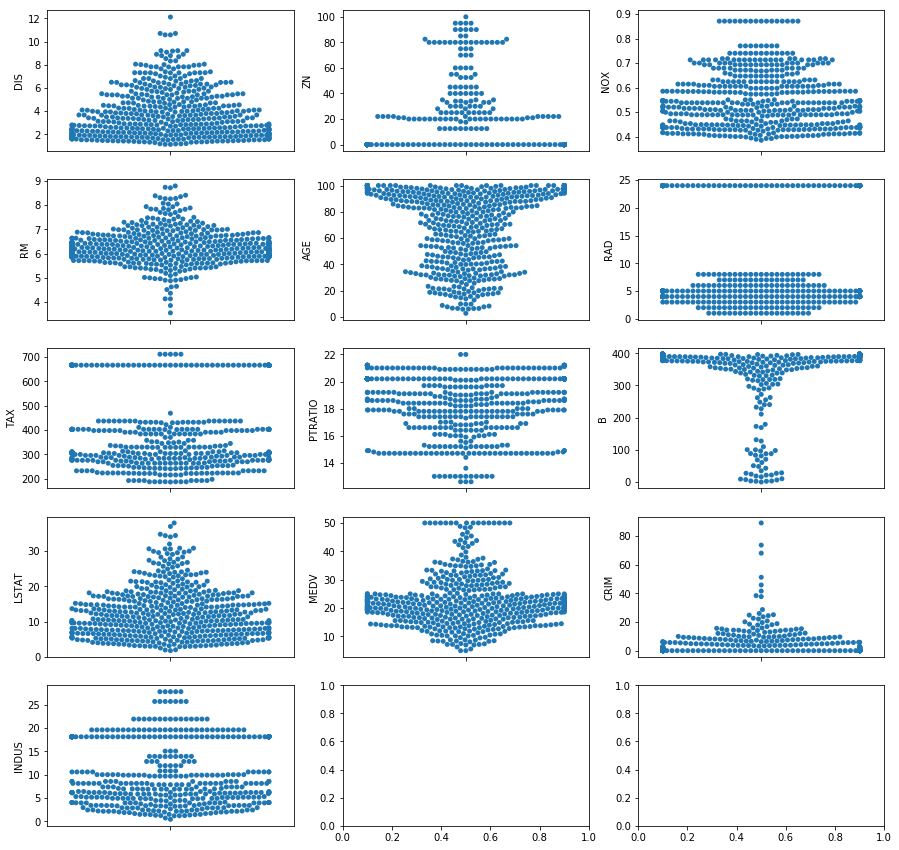

In [71]:
## Univariate Analysis
#Plot scatterplot data to identify outliers 
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')    
fig, ax = plt.subplots(figsize=(15,15), ncols=3, nrows=5)
sns.swarmplot(y="DIS",data=df,ax=ax[0][0])
sns.swarmplot(y="ZN",data=df, ax=ax[0][1])
sns.swarmplot(y="NOX",data=df,ax=ax[0][2])
sns.swarmplot(y="RM",data=df,ax=ax[1][0])
sns.swarmplot(y="AGE",data=df,ax=ax[1][1])
sns.swarmplot(y="RAD",data=df,ax=ax[1][2])
sns.swarmplot(y="TAX",data=df,ax=ax[2][0])
sns.swarmplot(y="PTRATIO",data=df,ax=ax[2][1])
sns.swarmplot(y="B",data=df,ax=ax[2][2])
sns.swarmplot(y="LSTAT",data=df,ax=ax[3][0])
sns.swarmplot(y="MEDV",data=df,ax=ax[3][1])
sns.swarmplot(y="CRIM",data=df,ax=ax[3][2])
sns.swarmplot(y="INDUS",data=df,ax=ax[4][0])
sns.plt.show()

### Inferential Statistics 
#### Plot median house value distribution

The data was split between houses alongside the river and houses not alongside the river. The median values of these properties were plotted.

##### Observation
There is a normal distribution for the houses along the river and a bimodal distribution between those not along the river.

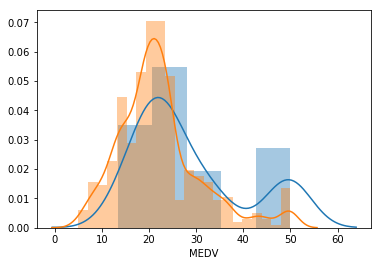

In [78]:
#x = np.random.normal(size=100)
## Select the data where the houses are along the river
r= df.loc[df['CHAS'] == 1]
## Select the data where the houses are not along the river
s = df.loc[df['CHAS'] == 0]
#Plot distributions of houses along the river and not along the river
sns.distplot(r.MEDV)
sns.distplot(s.MEDV)

#### Result - Independant T-Test
An independant t-test was conducted on the two groups median house values. The first group r consisted of the houses along the river and the secound group s consisted of the houses not along the river. 
The results indicated that with a p-value 0f 0.07 the results are not significantly different.

In [79]:
#Independant t-test

ttest = stats.ttest_ind(r['MEDV'], s['MEDV'])
print(ttest)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)


### Linear Regression 

#### Correlation Matrix Review

The correlation matrix was used to identify variables highly correlated to the median house prices.

From the correlation matrix the percentage of the population that is lower class(LSTAT) and the number of rooms per house(RM), have the highest correlation 74% and 70%. As the number of rooms (RM) increase the median house prices (MEDV) increase. In contrast to this as the lower class popoulation percentage (LSTAT) increases the median house prices decrease (MEDV).

The correlation matrix was used to check for multi-co-linearity. The variables RAD and TAX have a correlation of 91%. The variables DIS and Age have a correlation of 75%.NOX and INDUS have a correlation of 76%. Only one of each of the highly correlated variables will be selected for training the model.

#### Correlation Matrix Plot

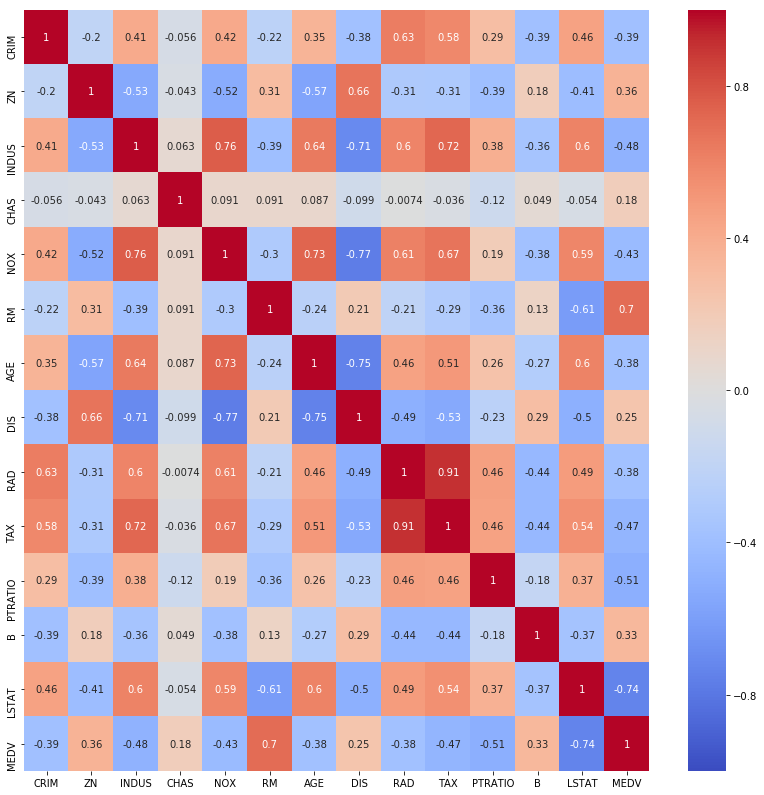

In [80]:
###BI Variate analysis
##Create correlation matrix

plt.figure(figsize=(14,14))
#Add coolwarn colour and annotations for each correlation
sns.heatmap(df.corr(),vmin=-1,cmap='coolwarm',annot=True);

#### Plot Distribution of Median House Prices

The median house price distribution is plotted, to see that the house prices are normally distributed. 

AttributeError: module 'seaborn' has no attribute 'plt'

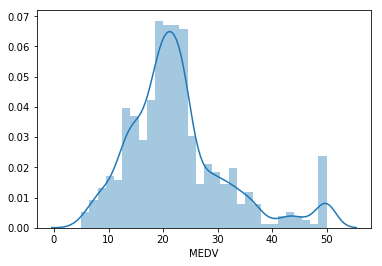

In [81]:
#Plots the distribution of the median house prices
sns.distplot(df['MEDV'], bins=30)
sns.plt.show()

#### Scatterplot 
The scatterplot was used to identify variables with a linear relationship to the median house prices.
It is evident from the plots that RM and LSTAT have a linear relationship. As the number of rooms (RM) increase the median value(MEDV) increases. Contrastingly as the percentage population of lower class increases, the median houses decrease.

AttributeError: module 'seaborn' has no attribute 'plt'

<Figure size 1200x1200 with 0 Axes>

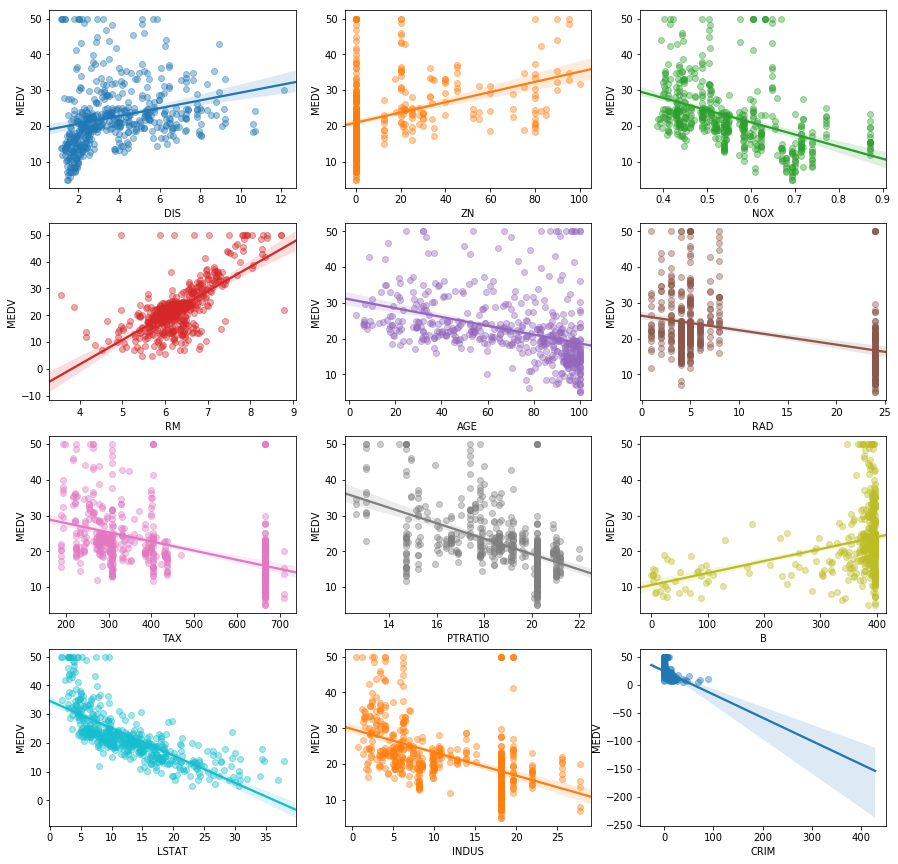

In [82]:
#Creates a multiple scatterplots for all variables against the target variable
fig= plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(figsize=(15,15), ncols=3, nrows=4)
sns.regplot("DIS","MEDV",df,ax=ax[0][0],scatter_kws={'alpha': 0.4})
sns.regplot("ZN","MEDV",df, ax=ax[0][1],scatter_kws={'alpha': 0.4})
sns.regplot("NOX","MEDV",df,ax=ax[0][2],scatter_kws={'alpha': 0.4})
sns.regplot("RM","MEDV",df,ax=ax[1][0],scatter_kws={'alpha': 0.4})
sns.regplot("AGE","MEDV",df,ax=ax[1][1],scatter_kws={'alpha': 0.4})
sns.regplot("RAD","MEDV",df,ax=ax[1][2],scatter_kws={'alpha': 0.4})
sns.regplot("TAX","MEDV",df,ax=ax[2][0],scatter_kws={'alpha': 0.4})
sns.regplot("PTRATIO","MEDV",df,ax=ax[2][1],scatter_kws={'alpha': 0.4})
sns.regplot("B","MEDV",df,ax=ax[2][2],scatter_kws={'alpha': 0.4})
sns.regplot("LSTAT","MEDV",df,ax=ax[3][0],scatter_kws={'alpha': 0.4})
sns.regplot("CRIM","MEDV",df,ax=ax[3][2],scatter_kws={'alpha': 0.4})
sns.regplot("INDUS","MEDV",df,ax=ax[3][1],scatter_kws={'alpha': 0.4})
sns.plt.show()

#### Multiple Linear Regression Model

#### Selecting Variables
Based on the correlation matrix, highly correlated variables were removed from the model. The removed varaiable consisted of INDUS,RAD and AGE. These varaibles were highly correlated to NOX ,TAX and DIS and deemed redundant variables in the model generation.

#### Split Test Train Data
The data was seperated into test and training datasets. A model was then trained on 80% of the dataset and tested on 20% of the unseen data.

In [ ]:
# Import Packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#This contains all columns excluding highly correlated variables =75%
X = df.drop(columns =['MEDV','INDUS','RAD','AGE'])
#This includes the target variable median house prices (MEDV)
y = df[['MEDV']]

# The train_test_split module splits the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)


In [83]:
# Control = Print test train split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


#### Generate Model

A linear regression model was generated to predict the median house prices based on the test dataset.

In [98]:
#Generate & Print predictions
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_train, y_train)
pred = lin_reg_mod.predict(X_test)
firstfivepredictions = np.array([pred[0:5]], dtype=object)
print(firstfivepredictions)

[[[24.88963777275659]
  [23.72141085316486]
  [29.364998677356006]
  [12.122386208111804]
  [21.44382254072641]]]


#### Evaluate Model

The mean squared error was used to evaluate the model.It returned the average squared difference between the predicted values and the true values. The closer the value is to one, the better the model has performed.

In [99]:
#Show mean squared error
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
print(test_set_rmse)

5.783509315085133


#### Principle Component Analysis
Based on the number high number of variables within the dataset a dimention reduction technique was used.
Principle component analysis (PCA) is a dimention reduction technique. It works by taking highly correlated variables and transforming them into linearly uncorrelated principal components. PCA comonents have no correlation with eachother.

#### PCA Scalability
In order to prevent a large value from doiminating the results, the data was scaled.PCA is affected by scalability.

In [102]:
X = df.drop(columns =['MEDV'])
#This includes the target variable median house prices (MEDV)
y = df[['MEDV']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

#### PCA Ratio
The PCA ratio was used to show the principle components which represent the most variance in the data.
From the results you can see that PCA one and two combined account for 57% of the variance in the data. 

In [76]:
pca.explained_variance_ratio_

array([0.47141676, 0.10796713, 0.09762974, 0.06960265, 0.06250519,
       0.05146177, 0.04131275, 0.02909632, 0.0223605 , 0.01562077,
       0.01396296, 0.01216231, 0.00490115])

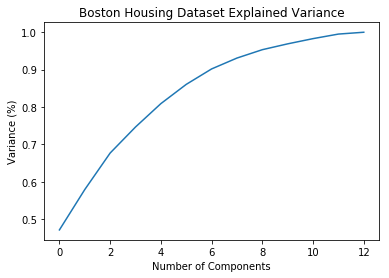

In [77]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Boston Housing Dataset Explained Variance')
plt.show()

#### Scatterplot PCA0 & PCA1

A scatterplot was generated to investiagte if there was a strong correlation between the first and second PCA's, which account for 57% of the variance in the data. 
Based on the output below there is not a strong linear reltionship indicating that there is no relationship between the two variables.

AttributeError: module 'seaborn' has no attribute 'plt'

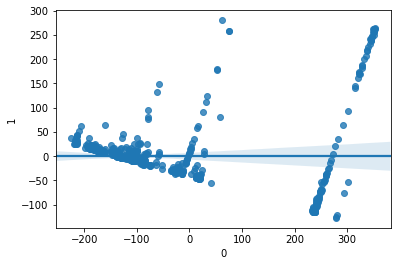

In [104]:
# use the function regplot to make a scatterplot
sns.regplot(x=x_pca[0], y=x_pca[1])
sns.plt.show()

### Using Keras to Predict House Prices

The Keras package was used to create neural networks inorder to predict the median house prices. The data and required pakages were imported.

All of the thirteen variables within the dataset were used to conduct the first prediction.

The data was split between between test and training data 20% and 80% respectively. 

#### Import parkages to create neural network

In [105]:
# For building neural networks.
import keras as kr

# For interacting with data sets.
import pandas as pd

# For encoding categorical variables.
import sklearn.preprocessing as pre

# For splitting into training and test datasets.
import sklearn.model_selection as mod

Using TensorFlow backend.


### Inputs for neural network

In [106]:
#Add heading to csv file
headings = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#Read in data from a csv file
df = pd.read_csv('housing.csv',delim_whitespace=True,names = headings) 
#Print first 5 lines of imported data 
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [107]:
#This contains all columns excluding the median house prices (MEDV)
inputs = df.drop(columns =['MEDV'])
#This only includes the column median house prices (MEDV)
outputs = df[['MEDV']]

### Split dataset into test & train data

In [108]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.2)

## Build Model

In [109]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with x neurons and an input layer with 4.
model.add(kr.layers.Dense(units=13, activation='relu', input_dim=13))
# Add a three neuron output layer.
model.add(kr.layers.Dense(units=1, activation='relu'))

# Build the graph.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [110]:
## Summary of the sequential model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [111]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.2)

In [112]:
inputs_test.iloc[0,:]

CRIM         0.18836
ZN           0.00000
INDUS        6.91000
CHAS         0.00000
NOX          0.44800
RM           5.78600
AGE         33.30000
DIS          5.10040
RAD          3.00000
TAX        233.00000
PTRATIO     17.90000
B          396.90000
LSTAT       14.15000
Name: 46, dtype: float64

In [113]:
model.predict(inputs_test.as_matrix()[0:1])

C:\Users\Harvey Norman\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[-0.]], dtype=float32)

In [114]:
model.fit(inputs_train, outputs_train, epochs=1000, batch_size=50)

Epoch 1/1000
404/404 [==============================] - 0s 742us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 2/1000
404/404 [==============================] - 0s 39us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 3/1000
404/404 [==============================] - 0s 32us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 4/1000
404/404 [==============================] - 0s 41us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 5/1000
404/404 [==============================] - 0s 37us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 6/1000
404/404 [==============================] - 0s 32us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 7/1000
404/404 [==============================] - 0s 42us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 8/1000
404/404 [==============================] - 0s 27us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 9/1000
404/404 [==============================] - 0s 32us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 10/1000
404/

404/404 [==============================] - 0s 44us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 76/1000
404/404 [==============================] - 0s 37us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 77/1000
404/404 [==============================] - 0s 42us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 78/1000
404/404 [==============================] - 0s 39us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 79/1000
404/404 [==============================] - 0s 49us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 80/1000
404/404 [==============================] - 0s 44us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 81/1000
404/404 [==============================] - 0s 46us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 82/1000
404/404 [==============================] - 0s 49us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 83/1000
404/404 [==============================] - 0s 43us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 84/1000
404/404 [=

404/404 [==============================] - 0s 34us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 150/1000
404/404 [==============================] - 0s 51us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 151/1000
404/404 [==============================] - 0s 35us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 152/1000
404/404 [==============================] - 0s 46us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 153/1000
404/404 [==============================] - 0s 36us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 154/1000
404/404 [==============================] - 0s 40us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 155/1000
404/404 [==============================] - 0s 49us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 156/1000
404/404 [==============================] - 0s 39us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 157/1000
404/404 [==============================] - 0s 56us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 158/1000
4

404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 223/1000
404/404 [==============================] - 0s 42us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 224/1000
404/404 [==============================] - 0s 37us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 225/1000
404/404 [==============================] - 0s 57us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 226/1000
404/404 [==============================] - 0s 42us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 227/1000
404/404 [==============================] - 0s 54us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 228/1000
404/404 [==============================] - 0s 44us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 229/1000
404/404 [==============================] - 0s 52us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 230/1000
404/404 [==============================] - 0s 48us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 231/1000
4

404/404 [==============================] - 0s 53us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 296/1000
404/404 [==============================] - 0s 35us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 297/1000
404/404 [==============================] - 0s 37us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 298/1000
404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 299/1000
404/404 [==============================] - 0s 45us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 300/1000
404/404 [==============================] - 0s 85us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 301/1000
404/404 [==============================] - 0s 42us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 302/1000
404/404 [==============================] - 0s 49us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 303/1000
404/404 [==============================] - 0s 51us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 304/1000
4

404/404 [==============================] - 0s 39us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 369/1000
404/404 [==============================] - 0s 48us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 370/1000
404/404 [==============================] - 0s 54us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 371/1000
404/404 [==============================] - 0s 45us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 372/1000
404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 373/1000
404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 374/1000
404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 375/1000
404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 376/1000
404/404 [==============================] - 0s 40us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 377/1000
4

404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 442/1000
404/404 [==============================] - 0s 49us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 443/1000
404/404 [==============================] - 0s 53us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 444/1000
404/404 [==============================] - 0s 42us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 445/1000
404/404 [==============================] - 0s 45us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 446/1000
404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 447/1000
404/404 [==============================] - 0s 38us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 448/1000
404/404 [==============================] - 0s 46us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 449/1000
404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 450/1000
4

404/404 [==============================] - 0s 44us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 515/1000
404/404 [==============================] - 0s 44us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 516/1000
404/404 [==============================] - 0s 45us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 517/1000
404/404 [==============================] - 0s 50us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 518/1000
404/404 [==============================] - 0s 48us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 519/1000
404/404 [==============================] - 0s 49us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 520/1000
404/404 [==============================] - 0s 49us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 521/1000
404/404 [==============================] - 0s 44us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 522/1000
404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 523/1000
4

404/404 [==============================] - 0s 52us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 588/1000
404/404 [==============================] - 0s 52us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 589/1000
404/404 [==============================] - 0s 51us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 590/1000
404/404 [==============================] - 0s 52us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 591/1000
404/404 [==============================] - 0s 57us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 592/1000
404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 593/1000
404/404 [==============================] - 0s 62us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 594/1000
404/404 [==============================] - 0s 52us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 595/1000
404/404 [==============================] - 0s 52us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 596/1000
4

404/404 [==============================] - 0s 42us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 661/1000
404/404 [==============================] - 0s 54us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 662/1000
404/404 [==============================] - 0s 56us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 663/1000
404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 664/1000
404/404 [==============================] - 0s 57us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 665/1000
404/404 [==============================] - 0s 49us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 666/1000
404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 667/1000
404/404 [==============================] - 0s 44us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 668/1000
404/404 [==============================] - 0s 49us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 669/1000
4

404/404 [==============================] - 0s 32us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 734/1000
404/404 [==============================] - 0s 42us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 735/1000
404/404 [==============================] - 0s 48us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 736/1000
404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 737/1000
404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 738/1000
404/404 [==============================] - 0s 45us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 739/1000
404/404 [==============================] - 0s 48us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 740/1000
404/404 [==============================] - 0s 43us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 741/1000
404/404 [==============================] - 0s 44us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 742/1000
4

404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 807/1000
404/404 [==============================] - 0s 39us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 808/1000
404/404 [==============================] - 0s 38us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 809/1000
404/404 [==============================] - 0s 50us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 810/1000
404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 811/1000
404/404 [==============================] - 0s 52us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 812/1000
404/404 [==============================] - 0s 42us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 813/1000
404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 814/1000
404/404 [==============================] - 0s 89us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 815/1000
4

404/404 [==============================] - 0s 44us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 880/1000
404/404 [==============================] - 0s 41us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 881/1000
404/404 [==============================] - 0s 42us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 882/1000
404/404 [==============================] - 0s 46us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 883/1000
404/404 [==============================] - 0s 54us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 884/1000
404/404 [==============================] - 0s 49us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 885/1000
404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 886/1000
404/404 [==============================] - 0s 42us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 887/1000
404/404 [==============================] - 0s 44us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 888/1000
4

404/404 [==============================] - 0s 44us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 953/1000
404/404 [==============================] - 0s 45us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 954/1000
404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 955/1000
404/404 [==============================] - 0s 47us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 956/1000
404/404 [==============================] - 0s 46us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 957/1000
404/404 [==============================] - 0s 49us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 958/1000
404/404 [==============================] - 0s 37us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 959/1000
404/404 [==============================] - 0s 44us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 960/1000
404/404 [==============================] - 0s 52us/step - loss: 586.4665 - accuracy: 0.0000e+00
Epoch 961/1000
4

In [115]:
# Have the network predict the classes of the test inputs.
predictions = model.predict(inputs_test)
print(predictions)

[[-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]]


In [116]:
from sklearn.metrics import mean_squared_error
mean_squared_error(outputs_test,predictions) 

614.6457843137255

### Calculate error in model (Using mean absolute error)

In [117]:
#https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

np.mean(abs(predictions - outputs_test))

MEDV    22.889216
dtype: float64

##### References 

[2] Data Cleaning with Python and Pandas: Detecting Missing Values https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b (Accessed 21.11.19)

[3]Dimension Reduction Techniques with Python https://towardsdatascience.com/dimension-reduction-techniques-with-python-f36ca7009e5c (Accessed 21.11.19)

[4]SciKit Learn https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA (Accessed 21.11.19)

[5] A complete guide to scatterplots https://chartio.com/learn/charts/what-is-a-scatter-plot/ (Accessed 24.11.19)

[6] Linear Regression on Boston Housing Dataset https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 (Accessed 03.12.19)

[7] Example of Multiple Linear Regression in Python https://datatofish.com/multiple-linear-regression-python/ (Accessed 04.12.19)

[8] Implementing PCA in Python with Scikit-Learn https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/ (Accessed 4.12.19)

[9] Building our first neural network in keras https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5 Accessed (06.12.19)

[10] Multicollinearity https://en.wikipedia.org/wiki/Multicollinearity (06.12.19)

[11] GeekForGeeks Python | Mean Squared Error https://www.geeksforgeeks.org/python-mean-squared-error/